In [19]:
import os
import pandas as pd
import json
import shutil
import SimpleITK as sitk
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [6]:
path = '../data/N4_All_img/'
data_list = os.listdir(path)
pid_list = sorted(os.listdir(path))

In [16]:
h_list = []
w_list = []
r_list = []

for pid in tqdm(pid_list):
    pid_data_path = path + pid
    pid_data = np.load(pid_data_path)['BBOX']
    
    anno_max = np.max(pid_data)
    
    if anno_max == 0:
        continue
        
    anno_contour_list = cv2.findContours(
        pid_data, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
    if len(anno_contour_list) != 0 :
        for anno_contour in anno_contour_list:
            x_min = np.min(anno_contour[:,:,0])
            x_max = np.max(anno_contour[:,:,0])

            y_min = np.min(anno_contour[:,:,1])
            y_max = np.max(anno_contour[:,:,1])

            if (x_max - x_min) <= 3 or (y_max - y_min) <= 3:
                continue

            h = y_max - y_min
            w = x_max - x_min

            h_list.append(h)
            w_list.append(w)
            r_list.append(h/w)

100%|██████████| 7899/7899 [00:08<00:00, 933.28it/s] 


In [17]:
print(np.max(h_list))
print(np.min(h_list))

124
8


(array([ 134., 1222., 1332.,  519.,  161.,   74.,   53.,   39.,   43.,
          36.,   34.,   26.,   11.,    5.,    2.]),
 array([  8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,  88.,
         96., 104., 112., 120., 128.]),
 <BarContainer object of 15 artists>)

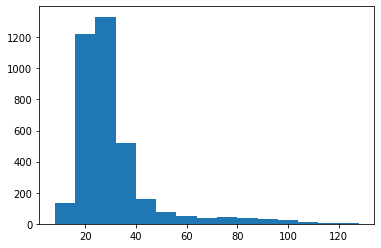

In [20]:
plt.hist(h_list, range=(8,128), bins=15)

In [3]:
with open('../config/N4_All_dict.json', 'r') as f:
    slice_info_dict = json.load(f)

In [4]:
slice_info_dict.keys()

dict_keys(['Train', 'Test', 'path_img'])

In [5]:
train_bbox = [0,0,0,0,0]
val_bbox = [0,0,0,0,0]
test_bbox = 0

for k in slice_info_dict['Train']:
    k_train_list = slice_info_dict['Train'][k]['train']
    for k_train_case in k_train_list:
        k_train_case_path = path + k_train_case + '.npz'
        k_train_case_bbox = np.load(k_train_case_path)['BBOX']
        if k_train_case_bbox.max() != 0:
            train_bbox[int(k)] += 1
            
    print(len(k_train_list), train_bbox[int(k)])

    k_val_list = slice_info_dict['Train'][k]['val']
    for k_val_case in k_val_list:
        k_val_case_path = path + k_val_case + '.npz'
        k_val_case_bbox = np.load(k_val_case_path)['BBOX']
        if k_val_case_bbox.max() != 0:
            val_bbox[int(k)] += 1
    
    print(len(k_val_list), val_bbox[int(k)], val_bbox[int(k)]/len(k_val_list))

4699 2264
1193 557 0.46689019279128247
4707 2221
1185 600 0.5063291139240507
4700 2207
1192 614 0.5151006711409396
4717 2274
1175 547 0.465531914893617
4745 2318
1147 503 0.4385353095030514


In [19]:
k_test_list = slice_info_dict['Test']
for k_test_case in k_test_list:
    k_test_case_path = path + k_test_case + '.npz'
    k_test_case_bbox = np.load(k_test_case_path)['BBOX']
    if k_test_case_bbox.max() != 0:
        test_bbox += 1
        
print(len(k_test_list), test_bbox, test_bbox/len(k_test_list))

2007 592 0.2949676133532636
